### **CS5783 - Assignment 3 : Deep Learning**

**Question 1**

In [1]:
#Library import
from keras.datasets import mnist, cifar10
from matplotlib import pyplot
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, Input
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import keras as ks
import tensorflow as tf


In [2]:
#Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalizing & reshaping intosingle channel
x_train_norm_mnist = x_train/255.0
x_test_norm_mnist = x_test/255.0
x_train_norm_reshaped = x_train_norm_mnist.reshape(-1, 28, 28, 1)
x_test_norm_reshaped = x_test_norm_mnist.reshape(-1, 28, 28, 1)

**Q(1.1)** **Regular CNN Model** : **Lth layer has more filters than L-1 th layer.**

In [4]:
#Regular CNN model with filters increasing by 2^x
regular_CNN = Sequential()

regular_CNN.add(Conv2D(8, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(16, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(32, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

regular_CNN.add(Conv2D(64, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(128, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(256, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(512, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

regular_CNN.add(Conv2D(1024, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(2048, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(4096, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(Flatten())
regular_CNN.add(Dense(10, activation='softmax'))
regular_CNN.build(input_shape=(1,28,28,1))
regular_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 8)            80        
                                                                 
 conv2d_1 (Conv2D)           (1, 28, 28, 16)           1168      
                                                                 
 conv2d_2 (Conv2D)           (1, 28, 28, 32)           4640      
                                                                 
 max_pooling2d (MaxPooling2D  (1, 14, 14, 32)          0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (1, 14, 14, 64)           18496     
                                                                 
 conv2d_4 (Conv2D)           (1, 14, 14, 128)          73856     
                                                        

In [7]:
reg_CNN_1 = ks.models.clone_model(regular_CNN)
reg_CNN_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reg_CNN_1.fit(x_train_norm_reshaped, y_train) 
reg_CNN_1.evaluate(x_test_norm_reshaped, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5698 - accuracy: 0.9851


[1.569840669631958, 0.9850999712944031]

In [5]:
regular_CNN = Sequential()

regular_CNN.add(Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

regular_CNN.add(Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

regular_CNN.add(Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
regular_CNN.add(Conv2D(110, kernel_size = (3,3), padding= 'same', activation='relu'))

regular_CNN.add(Flatten())
regular_CNN.add(Dense(10, activation='softmax'))
regular_CNN.build(input_shape=(1,28,28,1))
#regular_CNN.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
regular_CNN.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 20)           200       
                                                                 
 conv2d_11 (Conv2D)          (1, 28, 28, 30)           5430      
                                                                 
 conv2d_12 (Conv2D)          (1, 28, 28, 40)           10840     
                                                                 
 max_pooling2d_2 (MaxPooling  (1, 14, 14, 40)          0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (1, 14, 14, 50)           18050     
                                                                 
 conv2d_14 (Conv2D)          (1, 14, 14, 60)           27060     
                                                      

In [8]:
reg_CNN_1 = ks.models.clone_model(regular_CNN)
reg_CNN_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reg_CNN_1.fit(x_train_norm_reshaped, y_train) 
reg_CNN_1.evaluate(x_test_norm_reshaped, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3659 - accuracy: 0.9875


[1.365890383720398, 0.987500011920929]

The CNN model with filters increasing by 2^x takes a lot of computational effort and also doesnt give accuracy compared the CNN model with filters increasing by step of 10. So we use filters increasing by step of 10 for all the remaining calculations.

**Performance evaluation for regular CNN model for various hyperparameters settings**

In [9]:
reg_CNN_1 = ks.models.clone_model(regular_CNN)
reg_CNN_1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reg_CNN_1.fit(x_train_norm_reshaped, y_train) 
reg_CNN_1.evaluate(x_test_norm_reshaped, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 73.4496 - accuracy: 0.1135


[73.4496078491211, 0.11349999904632568]

In [10]:
reg_CNN_1 = ks.models.clone_model(regular_CNN)
reg_CNN_1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reg_CNN_1.fit(x_train_norm_reshaped, y_train,epochs=5, batch_size=1000) 
reg_CNN_1.evaluate(x_test_norm_reshaped, y_test)

Epoch 1/5


60/60 [==============================] - 10s 112ms/step - loss: 14237894656.0000 - accuracy: 0.1021
Epoch 2/5
60/60 [==============================] - 7s 112ms/step - loss: 2.3037 - accuracy: 0.1090
Epoch 3/5
60/60 [==============================] - 7s 111ms/step - loss: 2.3028 - accuracy: 0.1083
Epoch 4/5
60/60 [==============================] - 7s 111ms/step - loss: 2.3028 - accuracy: 0.1068
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 73.6308 - accuracy: 0.1135


[73.63082122802734, 0.11349999904632568]

I have varied the learning rate from 0.001 to 0.1 , varied batch size by 0,100 & 100 for epochs of 0,2 & 5 for the 3 optimizer models-Adam, SGD & RMSprop.
The accuracy for each model output is tabulated below for the regular CNN.


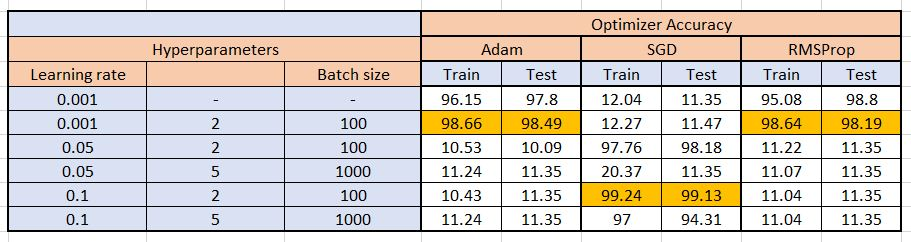

We observe that for Adam we get the best accuracy for low LR and low batch size. Whereas SGD gives good output for LR of 0.1 with lower batch size. RMSprop's output is almost similar to the Adam optimizer.

For regular CNN model we have the best accuracy of 99.24 by SGD optimizer for a LR of 0.1, 2 epochs and 100 batch size.

**Q(1.2): Inverted CNN Model**

In [6]:
invert_cnn = Sequential()

invert_cnn.add(Conv2D(110, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))

invert_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

invert_cnn.add(Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

invert_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

invert_cnn.add(Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))
invert_cnn.add(Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))

invert_cnn.add(Flatten())
invert_cnn.add(Dense(10, activation='softmax'))
invert_cnn.build(input_shape=(1,28,28,1))
invert_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (1, 28, 28, 110)          1100      
                                                                 
 conv2d_21 (Conv2D)          (1, 28, 28, 100)          99100     
                                                                 
 conv2d_22 (Conv2D)          (1, 28, 28, 90)           81090     
                                                                 
 max_pooling2d_4 (MaxPooling  (1, 14, 14, 90)          0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (1, 14, 14, 80)           64880     
                                                                 
 conv2d_24 (Conv2D)          (1, 14, 14, 70)           50470     
                                                      

In [ ]:
inverted_CNN = tf.keras.models.clone_model(invert_cnn)
inverted_CNN.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
inverted_CNN.fit(x_train_norm_reshaped, y_train)

1875/1875 [==============================] - 1917s 1s/step - loss: 0.1421 - accuracy: 0.9566


In [ ]:
inverted_CNN.evaluate(x_test_norm_reshaped, y_test)

313/313 [==============================] - 85s 271ms/step - loss: 1.6526 - accuracy: 0.9848


[1.6526148319244385, 0.9847999811172485]

Just like the regular CNN model we run the inverted CNN for LR of 0.001,0.05,0.01 & 0.1 while increasing the epochs from 0,2 & 5. The batch sizes are also varied to 0,100 & 100. After compariosn the following models is found to be the best.

The inverted CNN model performs best for Adam optimizer with hyperparameters set to a LR of 0.001, epoch of 1 by default and no batch size. Though its computationally very time consuming it gives the accuracy of 95.66 for training set and 98.48 for test set.

**Q(1.3): Hour Glass CNN Model**

In [11]:
hourglass_cnn = Sequential()

hourglass_cnn.add(Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))

hourglass_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

hourglass_cnn.add(Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))

hourglass_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

hourglass_cnn.add(Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
hourglass_cnn.add(Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))

hourglass_cnn.add(Flatten())
hourglass_cnn.add(Dense(10, activation='softmax'))
hourglass_cnn.build(input_shape=(1,28,28,1))
hourglass_cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hourglass_cnn.summary()

HourGlass_CNN = tf.keras.models.clone_model(hourglass_cnn)
HourGlass_CNN.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (1, 28, 28, 100)          1000      
                                                                 
 conv2d_31 (Conv2D)          (1, 28, 28, 80)           72080     
                                                                 
 conv2d_32 (Conv2D)          (1, 28, 28, 70)           50470     
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 14, 14, 70)          0         
 2D)                                                             
                                                                 
 conv2d_33 (Conv2D)          (1, 14, 14, 50)           31550     
                                                                 
 conv2d_34 (Conv2D)          (1, 14, 14, 20)           9020      
                                                      

In [12]:
HourGlass_CNN.fit(x_train_norm_reshaped, y_train, epochs= 1)
loss_2, acc_2 = HourGlass_CNN.evaluate(x_test_norm_reshaped, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4202 - accuracy: 0.9882


Just like the regular CNN model & inverted CNN we run the hourglass CNN for LR of 0.001,0.05,0.01 & 0.1 while increasing the epochs from 0,2 to 5. The batch sizes are also varied to 0,100 & 100. After compariosn the following models is found to be the best with accuracy of 96.21 for training and 98.82 for test.

Without decay, we must choose a very low learning rate to prevent the loss from diverging at a certain point of reduction for Adam and RMSprop optimizer. Since decay is not employed a small LR gives best performance for Adam.

Comparision of Final accuracy of the 3 networks
---

For **regular CNN model** we have the best accuracy of 99.24 by SGD optimizer for a LR of 0.1,  epochs = 2 and 100 batch size.

The **inverted CNN model** performs best for Adam optimizer with hyperparameters set to a LR of 0.001, epoch of 1 by default and no batch size. Though its computationally very time consuming it gives the accuracy of 95.66 for training set and 98.48 for test set.

The **hourglass CNN model** is found to be the best with accuracy of 96.21 for training and 98.82 for test with hyperparameters of LR = 0.001, epochs = 1 and no batch size.




### **Question 2**

Importing the data

In [13]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
print(x_train_cifar.shape, " -- ", y_train_cifar.shape, " -- ", x_test_cifar.shape," -- ", y_test_cifar.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)  --  (50000, 1)  --  (10000, 32, 32, 3)  --  (10000, 1)


Normalizing

In [14]:
x_train_cifar_norm = x_train_cifar/255.0
x_test_cifar_norm = x_test_cifar/255.0

Checking sample image

[0]


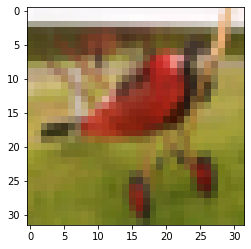

In [15]:
plt.imshow(x_train_cifar_norm[35])
print(y_train_cifar[35])

**LeNet CNN model construction**

In [16]:
leNet_1 = Sequential()
leNet_1.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), input_shape = (32, 32, 3), activation='relu'))
leNet_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
leNet_1.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
leNet_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
leNet_1.add(Conv2D(120, kernel_size = (5, 5), activation = 'relu'))
leNet_1.add(Flatten())
leNet_1.add(Dense(84))
leNet_1.add(Dense(10, activation='softmax'))

leNet_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_41 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_42 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

In [17]:
leNet_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training & Testingthe LeNet CNN model**

In [18]:
accuracy= leNet_1.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=500)

Epoch 1/25
100/100 [==============================] - 2s 9ms/step - loss: 1.8930 - accuracy: 0.3072
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 1.6183 - accuracy: 0.4188
Epoch 3/25
100/100 [==============================] - 1s 9ms/step - loss: 1.4839 - accuracy: 0.4684
Epoch 4/25
100/100 [==============================] - 1s 9ms/step - loss: 1.3984 - accuracy: 0.5008
Epoch 5/25
100/100 [==============================] - 1s 9ms/step - loss: 1.3605 - accuracy: 0.5164
Epoch 6/25
100/100 [==============================] - 1s 9ms/step - loss: 1.3110 - accuracy: 0.5388
Epoch 7/25
100/100 [==============================] - 1s 8ms/step - loss: 1.2735 - accuracy: 0.5487
Epoch 8/25
100/100 [==============================] - 1s 8ms/step - loss: 1.2437 - accuracy: 0.5624
Epoch 9/25
100/100 [==============================] - 1s 9ms/step - loss: 1.2068 - accuracy: 0.5727
Epoch 10/25
100/100 [==============================] - 1s 8ms/step - loss: 1.1913 - accuracy: 0.5779

In [19]:
leNet_1.evaluate(x_test_cifar_norm, y_test_cifar)

313/313 [==============================] - 1s 3ms/step - loss: 1.0673 - accuracy: 0.6259


[1.0672777891159058, 0.6258999705314636]

## **Q2.1)..Effect of learning rate on the training process**

In [20]:
lst_lr = [0.0001, 0.001, 0.005, 0.01, 0.1] # default LR of adam optimizer is 0.001
loss_acc_lst = []
loss_lst = []
acc_lst = []
for lr in lst_lr:
  print("Training with LR = ", lr)
  new_model = tf.keras.models.clone_model(leNet_1)
  new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
  new_model.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=1000)
  loss, acc = new_model.evaluate(x_test_cifar_norm, y_test_cifar)
  loss_acc_lst.append([loss, acc])
  loss_lst.append(loss)
  acc_lst.append(acc)
  print("\n")

Training with LR =  0.0001
Epoch 1/25
50/50 [==============================] - 2s 15ms/step - loss: 2.2581 - accuracy: 0.1578
Epoch 2/25
50/50 [==============================] - 1s 16ms/step - loss: 2.0747 - accuracy: 0.2579
Epoch 3/25
50/50 [==============================] - 1s 16ms/step - loss: 1.9579 - accuracy: 0.2995
Epoch 4/25
50/50 [==============================] - 1s 16ms/step - loss: 1.8796 - accuracy: 0.3387
Epoch 5/25
50/50 [==============================] - 1s 15ms/step - loss: 1.8110 - accuracy: 0.3642
Epoch 6/25
50/50 [==============================] - 1s 16ms/step - loss: 1.7528 - accuracy: 0.3826
Epoch 7/25
50/50 [==============================] - 1s 16ms/step - loss: 1.7039 - accuracy: 0.3987
Epoch 8/25
50/50 [==============================] - 1s 16ms/step - loss: 1.6647 - accuracy: 0.4105
Epoch 9/25
50/50 [==============================] - 1s 16ms/step - loss: 1.6317 - accuracy: 0.4226
Epoch 10/25
50/50 [==============================] - 1s 16ms/step - loss: 1.6026 -

**Plotting Learning rate vs Accuracy**

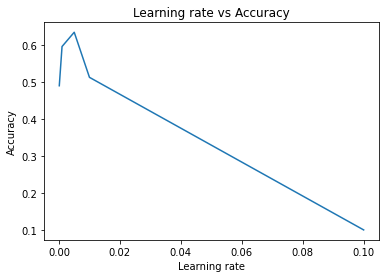

In [24]:
plt.plot(lst_lr,acc_lst)
plt.title("Learning rate vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

**Plotting Learning rate vs Loss**

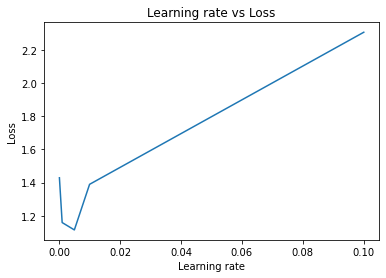

In [25]:
plt.plot(lst_lr,loss_lst)
plt.title("Learning rate vs Loss")
plt.ylabel("Loss")
plt.xlabel("Learning rate")
plt.show()

**After trying different learning rate, LR = 0.005 performed best with test accuracy of 59.07% and training of 61.87%**

## **Q2.2)...Effect of batch size on the training process**



In [26]:
lst_batch_size = [100, 1000, 10000, 20000, 40000] # default LR of adam optimizer is 0.001
loss_acc_lst_batch = []
loss_lst_batch = []
acc_lst_batch = []
for batch_size in lst_batch_size:
  print("Training with batch size = ", batch_size)
  new_model = tf.keras.models.clone_model(leNet_1)
  new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  new_model.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=batch_size)
  loss_, acc_ = new_model.evaluate(x_test_cifar_norm, y_test_cifar)
  loss_acc_lst_batch.append([loss_, acc_])
  loss_lst_batch.append(loss_)
  acc_lst_batch.append(acc_)
  print("\n")

Training with batch size =  100
Epoch 1/25
500/500 [==============================] - 2s 4ms/step - loss: 1.6704 - accuracy: 0.3893
Epoch 2/25
500/500 [==============================] - 2s 4ms/step - loss: 1.4020 - accuracy: 0.4945
Epoch 3/25
500/500 [==============================] - 2s 4ms/step - loss: 1.3046 - accuracy: 0.5316
Epoch 4/25
500/500 [==============================] - 2s 4ms/step - loss: 1.2234 - accuracy: 0.5660
Epoch 5/25
500/500 [==============================] - 2s 4ms/step - loss: 1.1728 - accuracy: 0.5829
Epoch 6/25
500/500 [==============================] - 3s 6ms/step - loss: 1.1254 - accuracy: 0.6023
Epoch 7/25
500/500 [==============================] - 3s 6ms/step - loss: 1.0807 - accuracy: 0.6187
Epoch 8/25
500/500 [==============================] - 4s 8ms/step - loss: 1.0429 - accuracy: 0.6317
Epoch 9/25
500/500 [==============================] - 2s 5ms/step - loss: 1.0055 - accuracy: 0.6472
Epoch 10/25
500/500 [==============================] - 3s 6ms/step -

**After comparing the accuracy forvarious batch sizes, the model performed the best for batch size of 100 with accuracy of 74.96 for training set & 63.26 for test set.**

**Plotting Batch Size vs Accuracy & Loss**

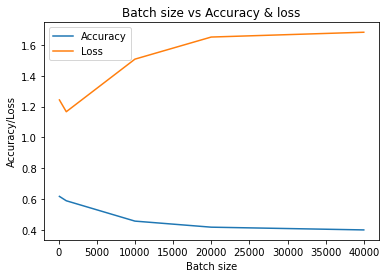

In [27]:
plt.plot(lst_batch_size, acc_lst_batch, label="Accuracy")
plt.plot(lst_batch_size, loss_lst_batch, label="Loss")
plt.legend()
plt.title("Batch size vs Accuracy & loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Batch size")
plt.show()

## **Q2.3)Try different hyperparameters to obtain the best accuracy on the test set.**

In [ ]:
best_acc_model = tf.keras.models.clone_model(leNet_1)
best_acc_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
best_acc_model.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=1000)
loss__, acc__ = best_acc_model.evaluate(x_test_cifar_norm, y_test_cifar)

Epoch 1/25
50/50 [==============================] - 1s 17ms/step - loss: 1.9666 - accuracy: 0.2745
Epoch 2/25
50/50 [==============================] - 1s 15ms/step - loss: 1.5684 - accuracy: 0.4299
Epoch 3/25
50/50 [==============================] - 1s 16ms/step - loss: 1.3768 - accuracy: 0.5023
Epoch 4/25
50/50 [==============================] - 1s 15ms/step - loss: 1.2530 - accuracy: 0.5517
Epoch 5/25
50/50 [==============================] - 1s 15ms/step - loss: 1.1904 - accuracy: 0.5761
Epoch 6/25
50/50 [==============================] - 1s 15ms/step - loss: 1.1240 - accuracy: 0.5997
Epoch 7/25
50/50 [==============================] - 1s 16ms/step - loss: 1.0993 - accuracy: 0.6107
Epoch 8/25
50/50 [==============================] - 1s 15ms/step - loss: 1.0378 - accuracy: 0.6323
Epoch 9/25
50/50 [==============================] - 1s 16ms/step - loss: 1.0160 - accuracy: 0.6420
Epoch 10/25
50/50 [==============================] - 1s 15ms/step - loss: 0.9728 - accuracy: 0.6571
Epoch 11/

In [ ]:
best_acc_model = tf.keras.models.clone_model(leNet_1)
best_acc_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
best_acc_model.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=100)
loss__, acc__ = best_acc_model.evaluate(x_test_cifar_norm, y_test_cifar)

Epoch 1/25
500/500 [==============================] - 40s 78ms/step - loss: 1.6992 - accuracy: 0.3756
Epoch 2/25
500/500 [==============================] - 39s 78ms/step - loss: 1.4888 - accuracy: 0.4616
Epoch 3/25
500/500 [==============================] - 40s 81ms/step - loss: 1.4189 - accuracy: 0.4895
Epoch 4/25
500/500 [==============================] - 39s 78ms/step - loss: 1.3770 - accuracy: 0.5083
Epoch 5/25
500/500 [==============================] - 40s 80ms/step - loss: 1.3288 - accuracy: 0.5253
Epoch 6/25
500/500 [==============================] - 39s 79ms/step - loss: 1.2981 - accuracy: 0.5377
Epoch 7/25
500/500 [==============================] - 39s 79ms/step - loss: 1.2637 - accuracy: 0.5486
Epoch 8/25
500/500 [==============================] - 39s 79ms/step - loss: 1.2368 - accuracy: 0.5600
Epoch 9/25
500/500 [==============================] - 39s 78ms/step - loss: 1.2129 - accuracy: 0.5699
Epoch 10/25
500/500 [==============================] - 40s 81ms/step - loss: 1.193

In [ ]:
best_acc_model = tf.keras.models.clone_model(leNet_1)
best_acc_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
best_acc_model.fit(x_train_cifar_norm, y_train_cifar, epochs=15, batch_size=100)
loss__, acc__ = best_acc_model.evaluate(x_test_cifar_norm, y_test_cifar)

Epoch 1/15
500/500 [==============================] - 3s 4ms/step - loss: 1.7767 - accuracy: 0.3405
Epoch 2/15
500/500 [==============================] - 2s 5ms/step - loss: 1.5063 - accuracy: 0.4582
Epoch 3/15
500/500 [==============================] - 3s 7ms/step - loss: 1.3999 - accuracy: 0.4991
Epoch 4/15
500/500 [==============================] - 2s 5ms/step - loss: 1.3363 - accuracy: 0.5263
Epoch 5/15
500/500 [==============================] - 2s 5ms/step - loss: 1.2936 - accuracy: 0.5385
Epoch 6/15
500/500 [==============================] - 3s 6ms/step - loss: 1.2557 - accuracy: 0.5523
Epoch 7/15
500/500 [==============================] - 2s 5ms/step - loss: 1.2249 - accuracy: 0.5647
Epoch 8/15
500/500 [==============================] - 2s 4ms/step - loss: 1.1995 - accuracy: 0.5729
Epoch 9/15
500/500 [==============================] - 2s 5ms/step - loss: 1.1793 - accuracy: 0.5807
Epoch 10/15
500/500 [==============================] - 2s 5ms/step - loss: 1.1683 - accuracy: 0.5884

In [ ]:
best_acc_model = tf.keras.models.clone_model(leNet_1)
best_acc_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
best_acc_model.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=100)
loss__, acc__ = best_acc_model.evaluate(x_test_cifar_norm, y_test_cifar)

Epoch 1/25
500/500 [==============================] - 2s 4ms/step - loss: 1.6885 - accuracy: 0.3863
Epoch 2/25
500/500 [==============================] - 2s 4ms/step - loss: 1.4166 - accuracy: 0.4868
Epoch 3/25
500/500 [==============================] - 2s 4ms/step - loss: 1.3073 - accuracy: 0.5321
Epoch 4/25
500/500 [==============================] - 2s 4ms/step - loss: 1.2186 - accuracy: 0.5679
Epoch 5/25
500/500 [==============================] - 3s 6ms/step - loss: 1.1606 - accuracy: 0.5873
Epoch 6/25
500/500 [==============================] - 2s 4ms/step - loss: 1.1025 - accuracy: 0.6099
Epoch 7/25
500/500 [==============================] - 2s 4ms/step - loss: 1.0572 - accuracy: 0.6270
Epoch 8/25
500/500 [==============================] - 2s 5ms/step - loss: 1.0128 - accuracy: 0.6438
Epoch 9/25
500/500 [==============================] - 2s 4ms/step - loss: 0.9808 - accuracy: 0.6552
Epoch 10/25
500/500 [==============================] - 2s 4ms/step - loss: 0.9507 - accuracy: 0.6677

**Here, I experimented with changing the hyperparameters such as the epoch from 10, 15, 20, and 25, batch size from 100 to 50000, and learning rate, and the best model I found was for the following hyperparameters:**


1.   **Learning Rate = 0.001**
2.   **Batch Size    = 100**
3.   **Epochs        = 25**

**With an accuracy of 75.41% for training set & 62.35% for test set.**



## **Q2.4)Designing an equivalent feed forward network for the same task**

In [ ]:
Feed_FW_NN = Sequential()
Feed_FW_NN.add(Flatten())
Feed_FW_NN.add(Dense(456, activation='relu'))
Feed_FW_NN.add(Dense(2416, activation='relu'))
Feed_FW_NN.add(Dense(48120, activation='relu'))
Feed_FW_NN.add(Dense(84, activation='relu'))  # For this layer have kept neurons as 84 because Question 2.4 says 
#                                                   to use no. of param as number of neurons for convolution layer only
Feed_FW_NN.add(Dense(10, activation='softmax'))
Feed_FW_NN.build(input_shape = (50000, 32, 32, 3))
Feed_FW_NN.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy']) # default learning rate of 0.001
Feed_FW_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (50000, 3072)             0         
                                                                 
 dense_2 (Dense)             (50000, 456)              1401288   
                                                                 
 dense_3 (Dense)             (50000, 2416)             1104112   
                                                                 
 dense_4 (Dense)             (50000, 48120)            116306040 
                                                                 
 dense_5 (Dense)             (50000, 84)               4042164   
                                                                 
 dense_6 (Dense)             (50000, 10)               850       
                                                                 
Total params: 122,854,454
Trainable params: 122,854,45

In [ ]:
Feed_FW_NN.fit(x_train_cifar_norm, y_train_cifar, epochs=25, batch_size=1000)

Epoch 1/25
50/50 [==============================] - 11s 216ms/step - loss: 2.1060 - accuracy: 0.2641
Epoch 2/25
50/50 [==============================] - 11s 219ms/step - loss: 2.0391 - accuracy: 0.2778
Epoch 3/25
50/50 [==============================] - 11s 221ms/step - loss: 1.9860 - accuracy: 0.2948
Epoch 4/25
50/50 [==============================] - 11s 220ms/step - loss: 1.9448 - accuracy: 0.3085
Epoch 5/25
50/50 [==============================] - 11s 219ms/step - loss: 1.9135 - accuracy: 0.3201
Epoch 6/25
50/50 [==============================] - 11s 219ms/step - loss: 1.8886 - accuracy: 0.3299
Epoch 7/25
50/50 [==============================] - 11s 219ms/step - loss: 1.8722 - accuracy: 0.3373
Epoch 8/25
50/50 [==============================] - 11s 219ms/step - loss: 1.8532 - accuracy: 0.3433
Epoch 9/25
50/50 [==============================] - 11s 220ms/step - loss: 1.8394 - accuracy: 0.3474
Epoch 10/25
50/50 [==============================] - 11s 220ms/step - loss: 1.8330 - accura

In [ ]:
Feed_FW_NN.evaluate(x_test_cifar_norm, y_test_cifar)

313/313 [==============================] - 2s 5ms/step - loss: 1.6758 - accuracy: 0.4100


[1.6758017539978027, 0.4099999964237213]

**Q2.4)**When comparing performance with Convolutional Neural network, we can see that it has less accuracy and not able to learn parameters that well.
<Br> **Part a:** The accuracy of feed forward network is 41% when compared to 62.35% of the best performing LeNet.
<Br> **Part b:**Parameters in feed forward network are 122,854,454 whereas we have 62,006 parameters in LeNet network. The excess number of parameters is not really helpful as the accuracy is still low compared to LeNet.